In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [2]:
#read csv file
df=pd.read_csv('/home/simarahmani/Desktop/codes/dataset/secondary+mushroom+dataset/MushroomDataset/secondary_data.csv', sep=';')
print(df)

      class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN  

In [3]:
#specify all the columns and categorical columns  names
df.columns
cat_columns=['cap-shape','cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color','stem-root','stem-surface','stem-color','veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season']

In [4]:
#Encoding features
ohe=OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
ohetransform=ohe.fit_transform(df[cat_columns])
df=pd.concat([df,ohetransform], axis=1).drop(columns=cat_columns)
df.head()

,class,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,p,15.26,16.95,17.09,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,p,16.60,17.99,18.19,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,p,14.07,17.80,17.74,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,p,14.17,15.77,15.98,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,p,14.64,16.53,17.20,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
#specify target and features
x=df.drop('class', axis=1)
y=df['class']

In [6]:
x.columns

Index(['cap-diameter', 'stem-height', 'stem-width', 'cap-shape_b',
       'cap-shape_c', 'cap-shape_f', 'cap-shape_o', 'cap-shape_p',
       'cap-shape_s', 'cap-shape_x',
       ...
       'habitat_h', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w', 'season_a', 'season_s', 'season_u', 'season_w'],
      dtype='object', length=128)

In [7]:
#Encode categorial target variable
Label_encoder_y=LabelEncoder()
y_encoded=Label_encoder_y.fit_transform(y)

In [8]:
df.shape

(61069, 129)

In [9]:
#split dataset into training and test set
x_encoded_train, x_encoded_test, y_encoded_train, y_encoded_test = train_test_split(x,y_encoded, test_size=0.2, random_state=42)

In [10]:
x_encoded_train.shape

(48855, 128)

In [11]:
#initialize the Decision Tree 
model=DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=42, class_weight=None )

In [12]:
#train the classifier
model.fit(x_encoded_train,y_encoded_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [13]:
#make predictions on test data
y_pred=model.predict(x_encoded_test)

In [14]:
#Evaluate the model
Accuracy=accuracy_score(y_encoded_test,y_pred)
print(f'accuracy:{Accuracy}')
Classification_report=classification_report(y_encoded_test, y_pred)
print(f'Classification Report:{Classification_report}')

accuracy:0.9993450139184542
Classification Report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



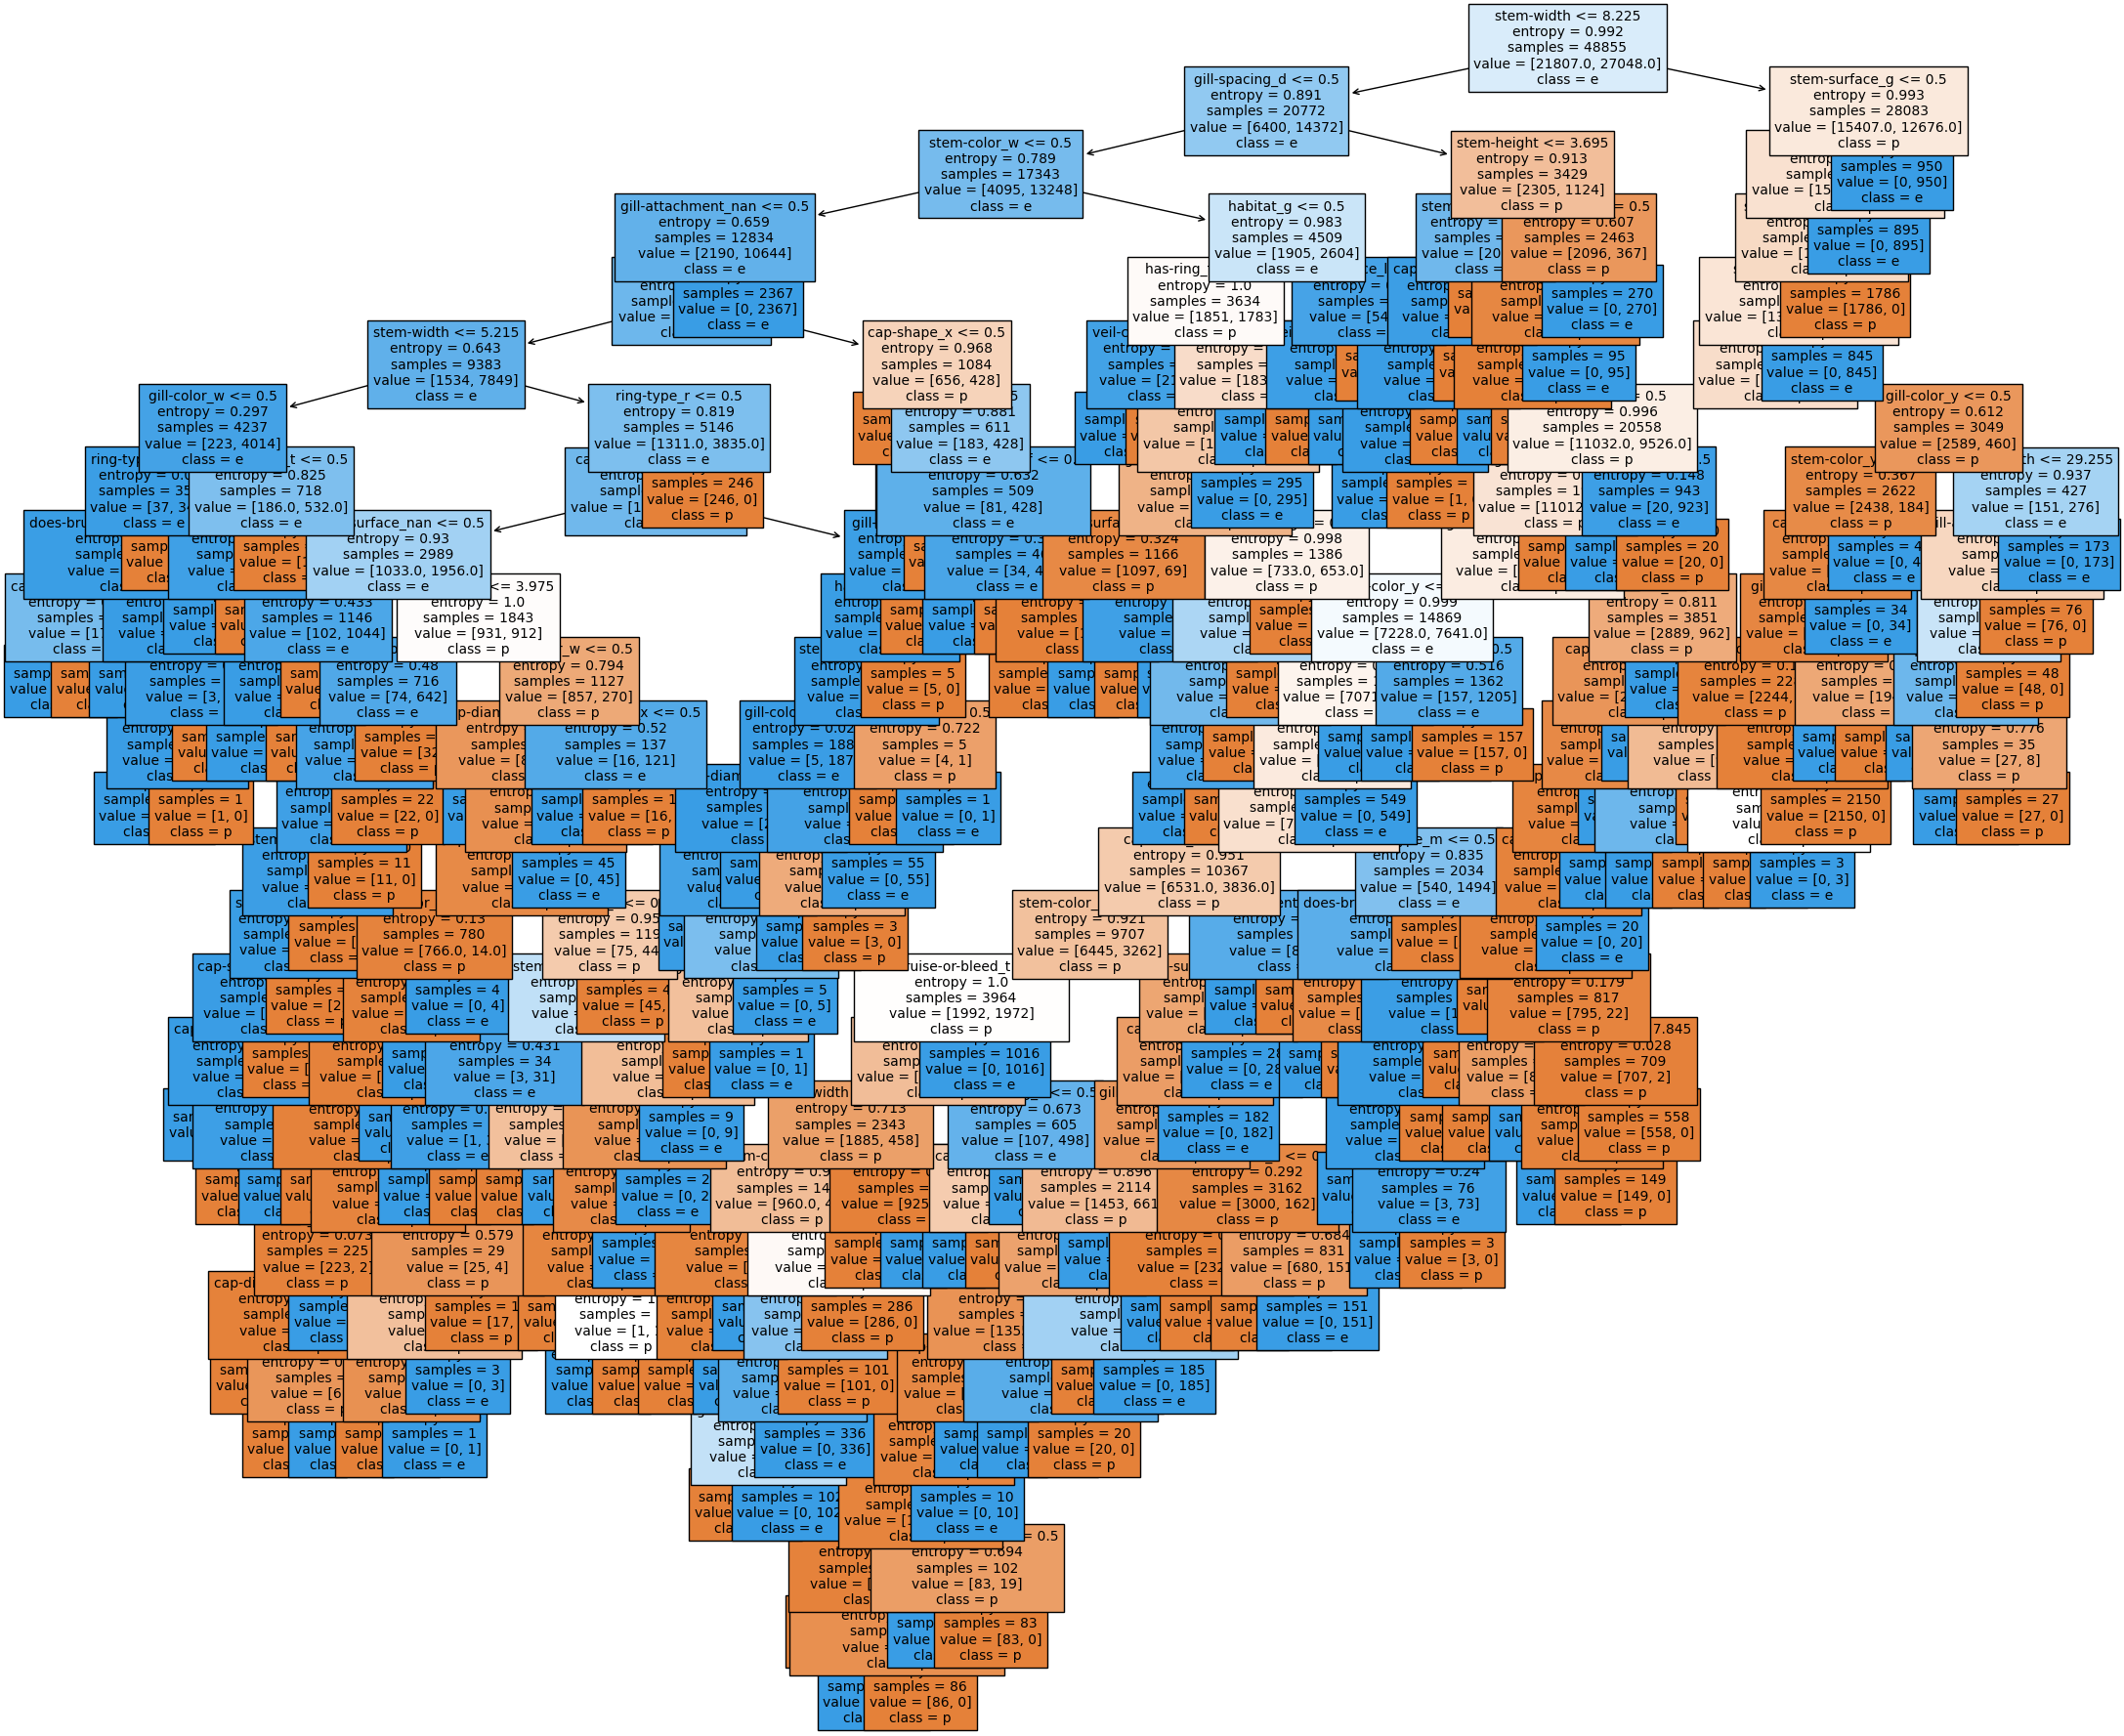

In [15]:
#visualization
plt.figure(figsize=(22,18))
#plot_tree(model, filled=True, feature_names=['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color','does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color','stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color','veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color','habitat', 'season'], class_names=['p','e'], fontsize=10)
plot_tree(model, filled=True, feature_names=df.columns[1:], class_names=['p','e'], fontsize=10)
plt.tight_layout()
plt.show()